Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Usama"
COLLABORATORS = ""

---

# CS110 Pre-class Work 5.2

## Question 1.
Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

The main purpose of partitioning the array is that we can divide it into subarrays where the elements before the pivot point are all smaller than the pivot whereas the elements after the pivot are all larger than it. The partition on this list will be performed in this way. Firstly, we will start by choosing a pivot that could be the first or the last element of the array. Suppose we choose the last element as our pivot i.e. 7. Now we will start compairing it with the first element of the list i.e. 1 and check whether it is greater or equal to the pivot. Which in this case is not true so we will increment i to this element to be able to swap later. Then we move our j to the next element which is 5. As, it is also smaller so it would be skipped again i will be incremented to the next element. This will go on until an element larger than the pivot is found which is 8. In which case i will be 8 and j will be 9. As the next element is also larger so it will be skipped to. Then i will still be 8 and j be 4. Now 4 is smaller than 7 so it will be swapped with 8 making the list [1,5,6,2,3,4,8,9,7]. Now i will be 4 and j will be 9. As the total length of list is reached so 7 will be incremented in place i+1 making the list [1,5,6,2,3,4,7,8,9].

## Question 2.
Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [1]:
import random
import time

def partition(A, p, r): #Defining the partitioning function
    x = A[r] #Setting the value of x to the index r
    i = p-1 #Setting the value of i to p-1
    for j in range(p, r): #for loop to pick up the partition element
        if A[j] <= x:  #If j is greater than or equal x
            i+=1 #The index should skip this element
            A[i], A[j] = A[j], A[i] #else swap the elements
    A[i+1], A[r] = A[r], A[i+1]
    return i+1

In [2]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3.

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [16]:
def quick_sort(A, p, r): #Sefining quick sort function
    if  p < r: #Setting the condition 
        q = partition(A, p, r) #Determining the partitioning elements
        quick_sort(A, p, q-1) #Applying quick sort on the parent list
        quick_sort(A, q+1, r) #Applying quick sort on the sublists
    return A

In [17]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4. 
Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


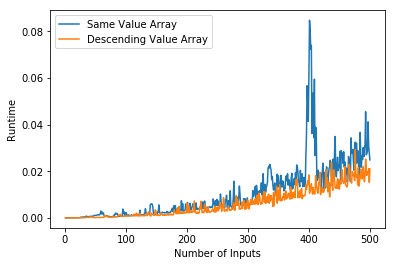

In [15]:
import matplotlib.pyplot as plt
N = 500

def quick_sort_time(A,p,r):
    start = time.clock()
    quick_sort(A,p,r)
    time_1= time.clock() - start
    return time_1

# algorithm for creating identical array of length x
def create_same(x):
    lst = []
    for i in range(x):
        lst.append(1)
    return lst

# algorithm for creating descending array of length x
def create_desc(x):
    lst = []
    for i in range(x):
        lst.append(x-i)
    return lst

x1 = [i for i in range(1,N+1)]
y1 = [quick_sort_time(create_same(i),0,i-1) for i in range(1,N+1)]

x2 = [i for i in range(1,N+1)]
y2 = [quick_sort_time(create_desc(i),0,i-1) for i in range(1,N+1)]

plt.xlabel('Number of Inputs')
plt.ylabel('Runtime')
plt.plot (x1,y1, label = 'Same Value Array')
plt.plot (x2,y2, label = 'Descending Value Array')
plt.legend()
plt.show()